___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv('treetypes.csv')

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,...,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,...,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,...,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,...,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,...,0,0,0,0,0,0,0,0,0,7


In [4]:
df.shape

(250000, 55)

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

Check for duplicates

In [5]:
df.duplicated().value_counts()

False    247479
True       2521
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(247479, 55)

In [7]:
df.reset_index(drop=True, inplace=True)
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
247474,2112,339,39,49,17,467,107,151,162,435,...,0,0,0,0,0,0,0,0,0,3
247475,2872,90,31,251,147,2027,248,172,27,508,...,0,0,0,0,0,0,0,0,0,5
247476,2336,57,5,0,0,1429,224,228,139,387,...,0,0,0,0,0,0,0,0,0,4
247477,2563,181,10,0,0,1349,223,246,156,1007,...,0,0,0,0,0,0,0,0,0,5
247478,3720,354,17,1112,311,5105,189,208,155,3256,...,0,0,0,0,0,0,0,0,1,7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247479 entries, 0 to 247478
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           247479 non-null  int64
 1   Aspect                              247479 non-null  int64
 2   Slope                               247479 non-null  int64
 3   Horizontal_Distance_To_Hydrology    247479 non-null  int64
 4   Vertical_Distance_To_Hydrology      247479 non-null  int64
 5   Horizontal_Distance_To_Roadways     247479 non-null  int64
 6   Hillshade_9am                       247479 non-null  int64
 7   Hillshade_Noon                      247479 non-null  int64
 8   Hillshade_3pm                       247479 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  247479 non-null  int64
 10  Wilderness_Area_1                   247479 non-null  int64
 11  Wilderness_Area_2                   247479 non-null 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,247479.0,2751.275106,417.898066,1859.0,2379.0,2757.0,3111.0,3857.0
Aspect,247479.0,156.338602,109.781113,0.0,65.0,125.0,261.0,360.0
Slope,247479.0,16.311259,8.312722,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,247479.0,228.699510,209.828664,0.0,67.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,247479.0,50.896783,61.024761,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,247479.0,1725.671467,1333.549780,0.0,759.0,1322.0,2305.0,7112.0
Hillshade_9am,247479.0,212.271813,30.658544,0.0,195.0,219.0,235.0,254.0
Hillshade_Noon,247479.0,218.539343,22.684922,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,247479.0,134.675815,45.954568,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,247479.0,1525.651801,1109.576738,0.0,736.0,1275.0,2005.0,7150.0


In [10]:
df.apply(lambda x: x.nunique())

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

In [11]:
numerical_data = [] # numeric continous columns

for col in df.columns:
    if df[col].nunique() > 7 : numerical_data.append(col)
print(numerical_data)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [12]:
categorical_data = [ 'Wilderness_Area', 'Soil_Type' ] # categoric columns
categorical_data

['Wilderness_Area', 'Soil_Type']

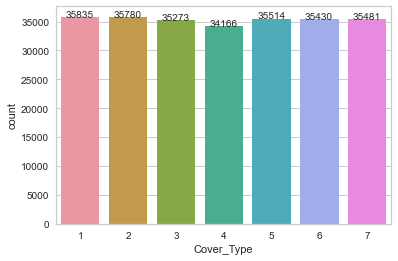

In [13]:
ax = sns.countplot(df.Cover_Type)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1));

In [14]:
df[numerical_data].describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,247479.0,2751.275106,417.898066,1859.0,2379.0,2757.0,3111.0,3857.0
Aspect,247479.0,156.338602,109.781113,0.0,65.0,125.0,261.0,360.0
Slope,247479.0,16.311259,8.312722,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,247479.0,228.699510,209.828664,0.0,67.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,247479.0,50.896783,61.024761,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,247479.0,1725.671467,1333.549780,0.0,759.0,1322.0,2305.0,7112.0
Hillshade_9am,247479.0,212.271813,30.658544,0.0,195.0,219.0,235.0,254.0
Hillshade_Noon,247479.0,218.539343,22.684922,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,247479.0,134.675815,45.954568,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,247479.0,1525.651801,1109.576738,0.0,736.0,1275.0,2005.0,7150.0


<AxesSubplot:>

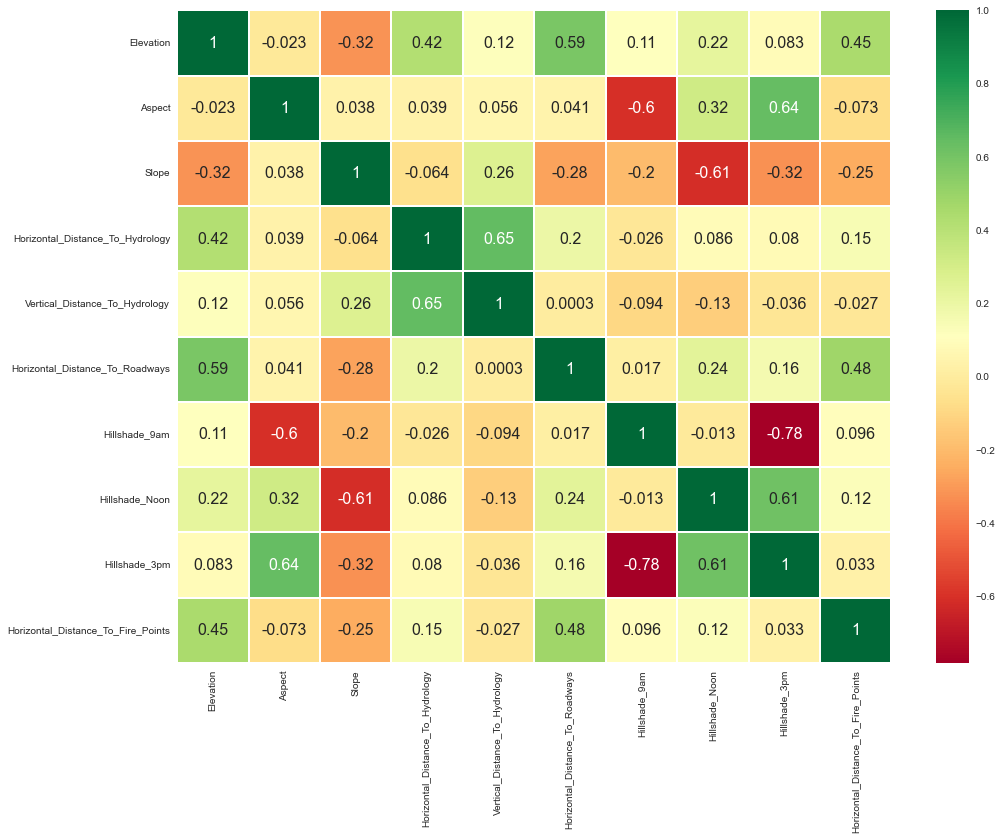

In [15]:
plt.figure(figsize = (16,12))
sns.heatmap(df[numerical_data].corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 16})

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [16]:
df.isnull().sum().any() # There are no feature with a null value

False

In [17]:
df.shape

(247479, 55)

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

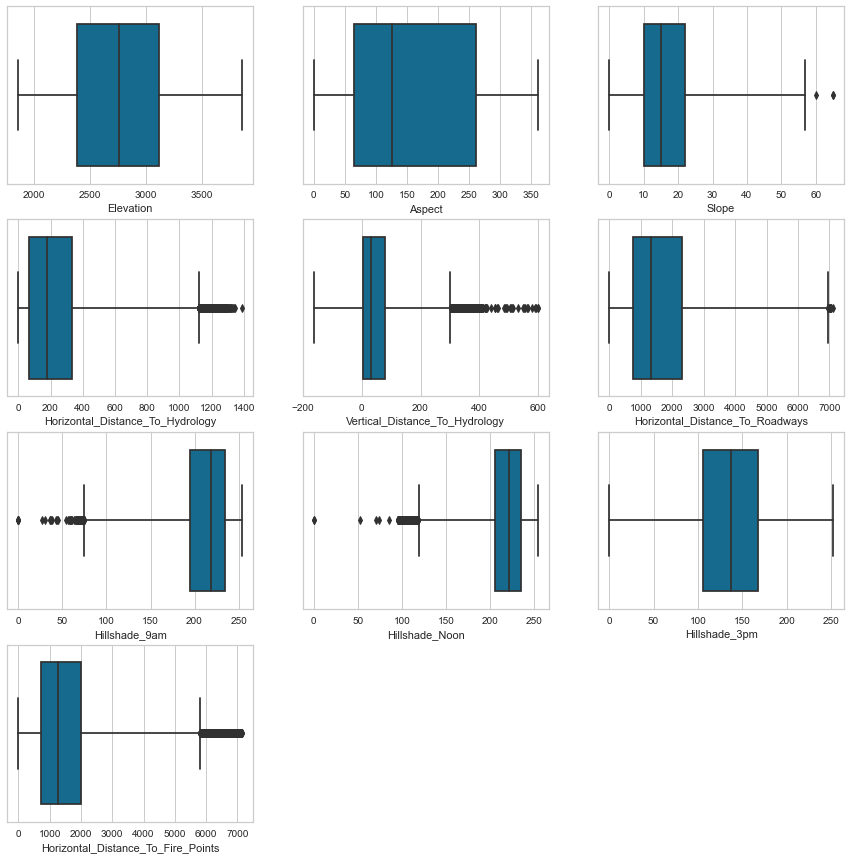

In [18]:
index = 0                          # let's check outliers numeric_features
plt.figure(figsize=(15,15))
for i in numerical_data:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=i, data=df, whis=3)

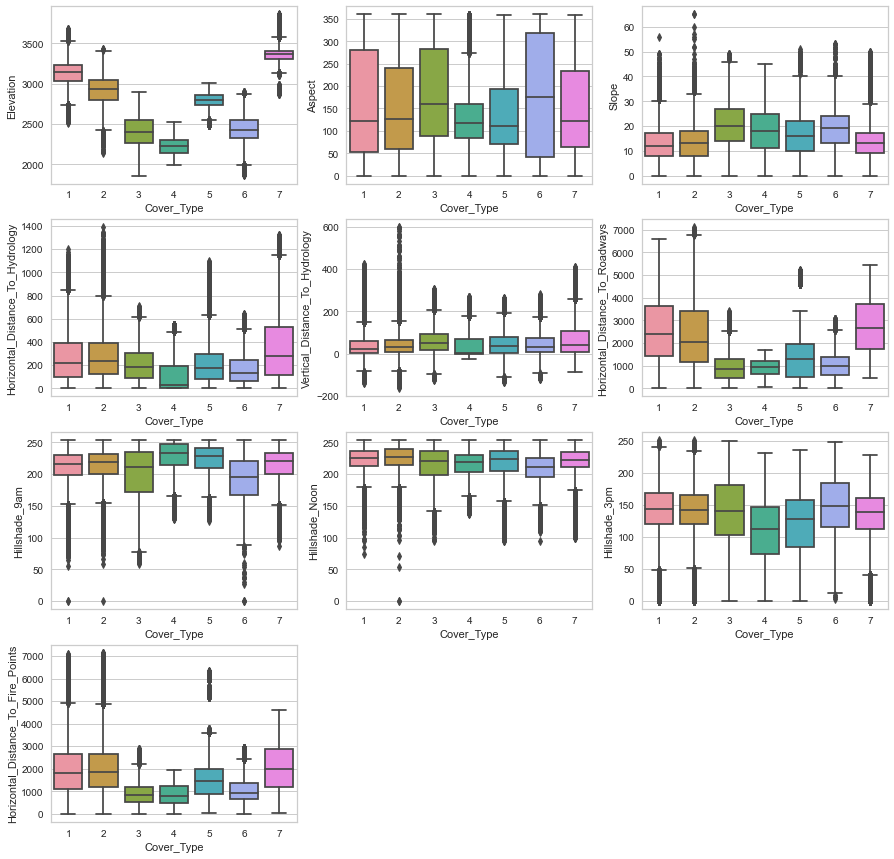

In [19]:
index = 0                          # let's check outliers numerical data with respect to target classes
plt.figure(figsize=(15,15))
for i in  numerical_data:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = i, x = "Cover_Type", data = df, whis=1.5)

In [20]:
def is_outlier(x, k):
    upper = np.quantile(x, 0.75)
    lower = np.quantile(x, 0.25)
    iqr = upper - lower
    max_treshold = upper + iqr * k
    min_treshold = lower - iqr * k
    if max_treshold > x.max():
        max_treshold = x.max()
    if min_treshold < x.min():
        min_treshold = x.min()
    print('-----',x.name,'-----')
    print('Upper Limit: ', max_treshold, '\n', 'Lower Limit: ', min_treshold, sep='')
    print('Number of outliers in the lower bound:', len(df[x<min_treshold]))
    print('Number of outliers in the upper bound:', len(df[x>max_treshold]))

In [21]:
for i in df[numerical_data]:
    is_outlier(df[i],3)

----- Elevation -----
Upper Limit: 3857
Lower Limit: 1859
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- Aspect -----
Upper Limit: 360
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 0
----- Slope -----
Upper Limit: 58.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 3
----- Horizontal_Distance_To_Hydrology -----
Upper Limit: 1119.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 762
----- Vertical_Distance_To_Hydrology -----
Upper Limit: 301.0
Lower Limit: -163
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 956
----- Horizontal_Distance_To_Roadways -----
Upper Limit: 6943.0
Lower Limit: 0
Number of outliers in the lower bound: 0
Number of outliers in the upper bound: 10
----- Hillshade_9am -----
Upper Limit: 254
Lower Limit: 75.0
Number of outliers in the lower bound: 78
N

### Deal with Outliers

#### *ii. Drop Outliers*

In [22]:
def remove_outlier(df_in, col_name,):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high),col_name]= np.nan

In [23]:
remove_outlier(df, "Slope")

In [24]:
df.Slope.isnull().sum()

3

In [25]:
df.shape

(247479, 55)

In [26]:
remove_outlier(df, "Horizontal_Distance_To_Hydrology")

In [27]:
df.Horizontal_Distance_To_Hydrology.isnull().sum()

762

In [28]:
remove_outlier(df, "Vertical_Distance_To_Hydrology")

In [29]:
df.Vertical_Distance_To_Hydrology.isnull().sum()

956

In [30]:
remove_outlier(df, "Horizontal_Distance_To_Roadways")

In [31]:
df.Horizontal_Distance_To_Roadways.isnull().sum()

10

In [32]:
remove_outlier(df, "Hillshade_9am")

In [33]:
df.Hillshade_9am.isnull().sum()

78

In [34]:
remove_outlier(df, "Hillshade_Noon")

In [35]:
df.Hillshade_Noon.isnull().sum()

194

In [36]:
remove_outlier(df, "Horizontal_Distance_To_Fire_Points")

In [37]:
df.Horizontal_Distance_To_Fire_Points.isnull().sum()

2334

In [38]:
df[numerical_data].isnull().sum()

Elevation                                0
Aspect                                   0
Slope                                    3
Horizontal_Distance_To_Hydrology       762
Vertical_Distance_To_Hydrology         956
Horizontal_Distance_To_Roadways         10
Hillshade_9am                           78
Hillshade_Noon                         194
Hillshade_3pm                            0
Horizontal_Distance_To_Fire_Points    2334
dtype: int64

In [39]:
df.dropna(inplace=True)    # we drop outliers

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243334 entries, 0 to 247477
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           243334 non-null  int64  
 1   Aspect                              243334 non-null  int64  
 2   Slope                               243334 non-null  float64
 3   Horizontal_Distance_To_Hydrology    243334 non-null  float64
 4   Vertical_Distance_To_Hydrology      243334 non-null  float64
 5   Horizontal_Distance_To_Roadways     243334 non-null  float64
 6   Hillshade_9am                       243334 non-null  float64
 7   Hillshade_Noon                      243334 non-null  float64
 8   Hillshade_3pm                       243334 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  243334 non-null  float64
 10  Wilderness_Area_1                   243334 non-null  int64  
 11  Wilderness_Area_2         

### Now, let's take a closer look at correlation of continuous columns.

<AxesSubplot:>

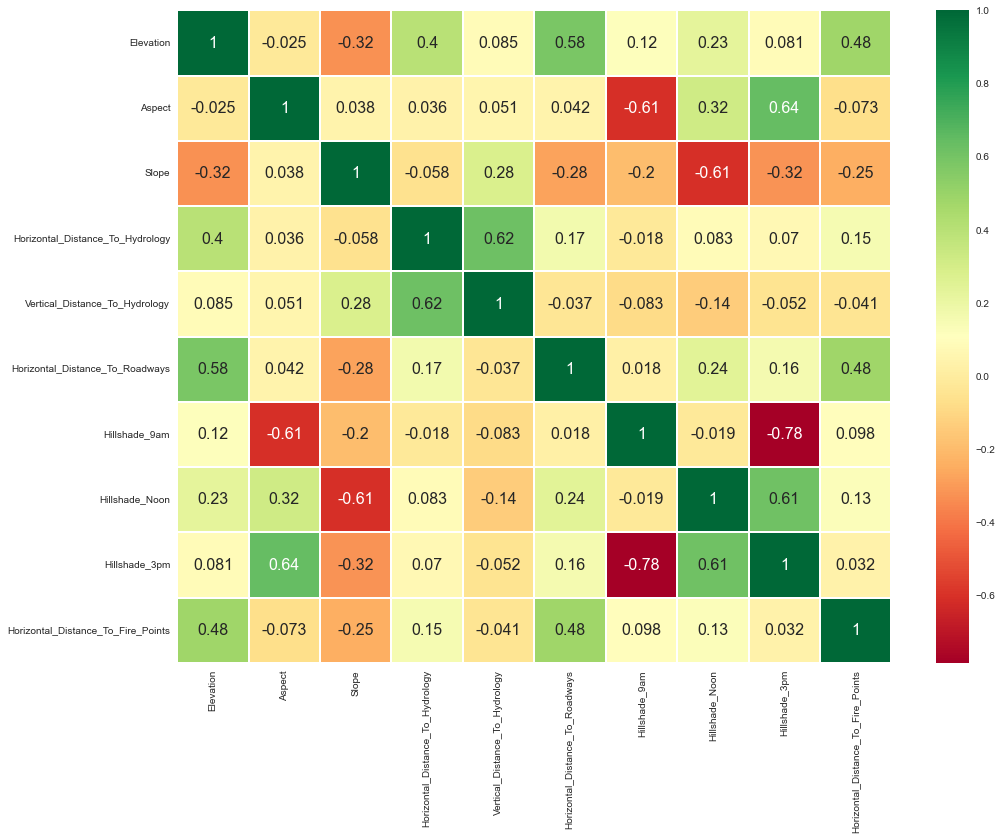

In [41]:
plt.figure(figsize = (16,12))
sns.heatmap(df[numerical_data].corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 16})

In [42]:
# The corr value has changed among some features

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [43]:
df[numerical_data].T

,0,1,2,3,4,5,6,7,8,9,...,247468,247469,247470,247471,247472,247473,247474,247475,247476,247477
Elevation,2696.0,3269.0,3283.0,2847.0,3248.0,2855.0,2410.0,2151.0,3255.0,2291.0,...,2647.0,3373.0,2131.0,2843.0,2714.0,2611.0,2112.0,2872.0,2336.0,2563.0
Aspect,123.0,110.0,322.0,89.0,93.0,162.0,331.0,337.0,357.0,32.0,...,345.0,93.0,20.0,198.0,127.0,111.0,339.0,90.0,57.0,181.0
Slope,10.0,19.0,18.0,31.0,12.0,5.0,21.0,30.0,19.0,7.0,...,20.0,12.0,18.0,9.0,11.0,14.0,39.0,31.0,5.0,10.0
Horizontal_Distance_To_Hydrology,212.0,134.0,346.0,270.0,507.0,85.0,124.0,67.0,339.0,0.0,...,195.0,574.0,162.0,857.0,0.0,345.0,49.0,251.0,0.0,0.0
Vertical_Distance_To_Hydrology,48.0,40.0,104.0,175.0,118.0,4.0,66.0,31.0,120.0,0.0,...,36.0,216.0,40.0,67.0,0.0,66.0,17.0,147.0,0.0,0.0
Horizontal_Distance_To_Roadways,2245.0,3734.0,4369.0,1320.0,570.0,2899.0,423.0,784.0,3829.0,487.0,...,2063.0,1409.0,300.0,2283.0,1444.0,1561.0,467.0,2027.0,1429.0,1349.0
Hillshade_9am,237.0,249.0,170.0,248.0,239.0,224.0,165.0,137.0,185.0,218.0,...,175.0,239.0,204.0,217.0,238.0,243.0,107.0,248.0,224.0,223.0
Hillshade_Noon,231.0,216.0,217.0,173.0,221.0,241.0,207.0,180.0,199.0,224.0,...,202.0,220.0,198.0,248.0,232.0,223.0,151.0,172.0,228.0,246.0
Hillshade_3pm,123.0,88.0,185.0,29.0,110.0,151.0,177.0,172.0,148.0,142.0,...,162.0,109.0,126.0,164.0,122.0,106.0,162.0,27.0,139.0,156.0
Horizontal_Distance_To_Fire_Points,2113.0,3960.0,1330.0,889.0,945.0,2568.0,589.0,491.0,3564.0,831.0,...,2517.0,989.0,404.0,1620.0,1378.0,1789.0,435.0,508.0,387.0,1007.0


In [44]:
# 1. Produce Hypotenuse of horizantal and vertical distances.
  
Hypotenuse_Distance_Hydrology = np.hypot(df.Horizontal_Distance_To_Hydrology, df.Vertical_Distance_To_Hydrology)
df["Hypotenuse_Distance_Hydrology"] = pd.DataFrame(Hypotenuse_Distance_Hydrology)

In [45]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Distance_Hydrology
0,2696,123,10.0,212.0,48.0,2245.0,237.0,231.0,123,2113.0,...,0,0,0,0,0,0,0,0,6,217.366051
1,3269,110,19.0,134.0,40.0,3734.0,249.0,216.0,88,3960.0,...,0,0,0,0,0,1,0,0,1,139.842769
2,3283,322,18.0,346.0,104.0,4369.0,170.0,217.0,185,1330.0,...,0,0,0,0,0,1,0,0,7,361.292126
3,2847,89,31.0,270.0,175.0,1320.0,248.0,173.0,29,889.0,...,0,0,0,0,0,0,0,0,5,321.753011
4,3248,93,12.0,507.0,118.0,570.0,239.0,221.0,110,945.0,...,0,0,0,0,0,0,0,0,7,520.550670


In [46]:
# 2.  Produce&transform an additional column which contains average of Horizantal Distances to Hydrology and Roadways.

df['Average_Distance_Hydrology_Roadways'] = df[['Horizontal_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways']].mean(axis=1)

In [47]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Distance_Hydrology,Average_Distance_Hydrology_Roadways
0,2696,123,10.0,212.0,48.0,2245.0,237.0,231.0,123,2113.0,...,0,0,0,0,0,0,0,6,217.366051,1228.5
1,3269,110,19.0,134.0,40.0,3734.0,249.0,216.0,88,3960.0,...,0,0,0,0,1,0,0,1,139.842769,1934.0
2,3283,322,18.0,346.0,104.0,4369.0,170.0,217.0,185,1330.0,...,0,0,0,0,1,0,0,7,361.292126,2357.5
3,2847,89,31.0,270.0,175.0,1320.0,248.0,173.0,29,889.0,...,0,0,0,0,0,0,0,5,321.753011,795.0
4,3248,93,12.0,507.0,118.0,570.0,239.0,221.0,110,945.0,...,0,0,0,0,0,0,0,7,520.550670,538.5


In [48]:
# 3 . Produce&transform an additional column which contains average of Elevation and Vertical_Distance_To_Hydrology columns.

df['Average_Distance_Elevation_VerHydrology'] = df[['Vertical_Distance_To_Hydrology', 'Elevation']].mean(axis=1)

In [49]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Hypotenuse_Distance_Hydrology,Average_Distance_Hydrology_Roadways,Average_Distance_Elevation_VerHydrology
0,2696,123,10.0,212.0,48.0,2245.0,237.0,231.0,123,2113.0,...,0,0,0,0,0,0,6,217.366051,1228.5,1372.0
1,3269,110,19.0,134.0,40.0,3734.0,249.0,216.0,88,3960.0,...,0,0,0,1,0,0,1,139.842769,1934.0,1654.5
2,3283,322,18.0,346.0,104.0,4369.0,170.0,217.0,185,1330.0,...,0,0,0,1,0,0,7,361.292126,2357.5,1693.5
3,2847,89,31.0,270.0,175.0,1320.0,248.0,173.0,29,889.0,...,0,0,0,0,0,0,5,321.753011,795.0,1511.0
4,3248,93,12.0,507.0,118.0,570.0,239.0,221.0,110,945.0,...,0,0,0,0,0,0,7,520.550670,538.5,1683.0


In [50]:
 # 4 . no need to have Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology columns, we drop them.
    
df.drop (['Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Hydrology'], inplace=True, axis=1)   

In [51]:
# reorder columns
df = df.reindex(list(df.columns[:8])+["Hypotenuse_Distance_Hydrology","Average_Distance_Hydrology_Roadways","Average_Distance_Elevation_VerHydrology"]+list(df.columns[8:-3]), axis=1)

In [52]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Hypotenuse_Distance_Hydrology',
       'Average_Distance_Hydrology_Roadways',
       'Average_Distance_Elevation_VerHydrology', 'Wilderness_Area_1',
       'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4',
       'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
       'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
       'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soi

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [54]:
X = df.drop(["Cover_Type"],axis=1) # Features
y = df["Cover_Type"] # Target

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [56]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [57]:
modelSVC = LinearSVC(class_weight = "balanced",random_state=101)

In [58]:
modelSVC.fit(X_train_scaled, y_train)

LinearSVC(class_weight='balanced', random_state=101)

In [59]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [60]:
y_pred = modelSVC.predict(X_test_scaled)

SVC_acc = accuracy_score(y_test, y_pred)
SVC_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(modelSVC, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[6918 1549   10    0  610  105 1355]
 [2647 4907  232    8 1969  440   78]
 [   0   38 5502 1482  691 2844    0]
 [   0    0  563 9318    0  369    0]
 [ 308 1458  791    0 7358  535    0]
 [   0  401 1794 1200 1087 6137    0]
 [1050    8   39    0   50    0 9150]]
              precision    recall  f1-score   support

           1       0.63      0.66      0.64     10547
           2       0.59      0.48      0.53     10281
           3       0.62      0.52      0.56     10557
           4       0.78      0.91      0.84     10250
           5       0.63      0.70      0.66     10450
           6       0.59      0.58      0.58     10619
           7       0.86      0.89      0.88     10297

    accuracy                           0.68     73001
   macro avg       0.67      0.68      0.67     73001
weighted avg       0.67      0.68      0.67     73001


Train_Set
[[16152  3577    23     0  1469   243  3144]
 [ 6104 11350   575    14  4573  1181   191]
 [    0    87 12773  3477 

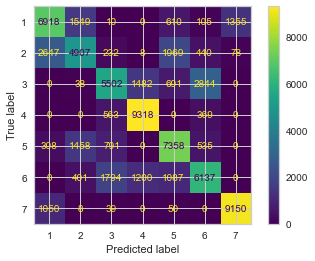

In [61]:
plot_confusion_matrix(modelSVC,X_test_scaled,y_test);

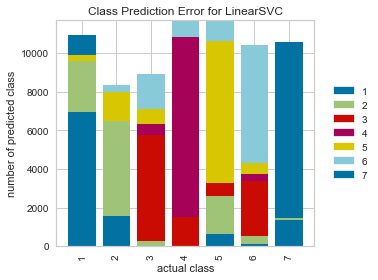

In [62]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(modelSVC)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

Grid Search with LinearSVC

In [63]:
linearsvc = LinearSVC()

param_grid = { 'penalty':['l2','l1'],
                'C':[0.01,0.1,1,10],
               'random_state': [101],}
gridlinearSVC = GridSearchCV(linearsvc, param_grid, cv=5)

In [64]:
gridlinearSVC.fit(X_train_scaled, y_train)

In [ ]:
gridlinearSVC.best_params_

In [ ]:
linearsvc = LinearSVC(C=10, random_state=101)
linearsvc.fit(X_train_scaled, y_train)
eval_metric(linearsvc, X_train_scaled, y_train, X_test_scaled, y_test)

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
# don't scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101) 

In [ ]:
DT_model = DecisionTreeClassifier(random_state=101)

In [ ]:
DT_model.fit(X_train,y_train)

In [ ]:
y_pred = DT_model.predict(X_test)

Model Performance on Classification Tasks

In [ ]:
DT_acc = accuracy_score(y_test, y_pred)
DT_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(DT_model, X_train, y_train, X_test, y_test)

NameError: name 'DT_model' is not defined

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(DT_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [ ]:
visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

Cross Validate

In [ ]:
model = DecisionTreeClassifier(random_state=101)     

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]

Feature Importance

In [ ]:
DT_model.feature_importances_

In [ ]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

Drop most important feature

In [ ]:
X2 = X.drop(columns = ["Elevation"]) 

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=101)


In [ ]:
DT2_model = DecisionTreeClassifier(random_state=101)


In [ ]:
DT2_model.fit(X_train2, y_train2) 


In [ ]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)


In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(DT2_model, support=True)
visualizer.fit(X_train2, y_train2)        
visualizer.score(X_test2, y_test2)        
visualizer.show()

In [ ]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]

Grid Search

In [ ]:
model = DecisionTreeClassifier(random_state=101)

In [ ]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 4, 7],    
              "max_depth": [None,2,3, 4, 5],                              
              "min_samples_leaf": [1, 3, 5, 7],
              "min_samples_split": [2, 3, 6, 7, 9]}

In [ ]:
dt_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

In [ ]:
dt_grid_model.fit(X_train, y_train)

In [ ]:
dt_grid_model.best_params_  

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(dt_grid_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [ ]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

ROC/AUC

In [ ]:
from yellowbrick.classifier import ROCAUC

In [ ]:
dt_model = DecisionTreeClassifier()
visualizer = ROCAUC(dt_model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show();  

In [ ]:
visualizer = ROCAUC(dt_grid_model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show(); 

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

RF_acc = accuracy_score(y_test, y_pred)
RF_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(rf_model, X_train, y_train, X_test, y_test)

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
visualizer = ClassPredictionError(rf_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [ ]:
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show(); 

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=101 ,eval_metric='mlogloss').fit(X_train, y_train)


In [ ]:
y_pred = rf_model.predict(X_test)

XGB_acc = accuracy_score(y_test, y_pred)
XGB_f1 = f1_score(y_test, y_pred, average = "macro")

eval_metric(xgb, X_train, y_train, X_test, y_test)

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(xgb, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [ ]:
visualizer = ClassPredictionError(xgb)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [ ]:
visualizer = ROCAUC(xgb)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show(); 

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy and F1 Score Comparison

In [ ]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest", "XGBoost"],
                        "F1_Score": [SVC_f1, DT_f1, RF_f1, XGB_f1],
                        "Accuracy": [SVC_acc, DT_acc, RF_acc, XGB_acc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(212)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

Since the random forest model, which has the highest accuracy and f1 score, is more efficient in terms of speed and cost, I chose to apply the random forest model.

# Modeling and Prediction

In [ ]:
import pickle   

In [ ]:
# we select random Forest Model
final_model = RandomForestClassifier(class_weight="balanced", random_state=101).fit(X, y) 

In [ ]:
pickle.dump(final_model, open("final_model_tree_types", 'wb'))

In [ ]:
my_dict = {"Elevation": 2800,
           "Aspect": 180,
           "Slope": 22,
           "Horizontal_Distance_To_Hydrology": 120,
           "Vertical_Distance_To_Hydrology": 45,
           "Horizontal_Distance_To_Roadways": 2600,
           "Hillshade_9am": 201,
           "Hillshade_Noon": 262,
           "Hillshade_3pm": 120,
           "Horizontal_Distance_To_Fire_Points": 3200,
           "Wilderness": "Area4",
           "Soil": "Type20"
          }

In [ ]:
my_dict = pd.DataFrame([my_dict])
my_dict

In [ ]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

In [ ]:
final_model.predict(my_dict)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___